# Regression Model Validation - Lab

## Introduction

In this lab, you'll be able to validate your Boston Housing data model using train-test split.


## Objectives

You will be able to:

- Compare training and testing errors to determine if model is over or underfitting


## Let's use our Boston Housing Data again!

This time, let's only include the variables that were previously selected using recursive feature elimination. We included the code to preprocess below.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import load_boston

boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)
b = boston_features['B']
logdis = np.log(boston_features['DIS'])
loglstat = np.log(boston_features['LSTAT'])

# Min-Max scaling
boston_features['B'] = (b-min(b))/(max(b)-min(b))
boston_features['DIS'] = (logdis-min(logdis))/(max(logdis)-min(logdis))

# Standardization
boston_features['LSTAT'] = (loglstat-np.mean(loglstat))/np.sqrt(np.var(loglstat))

In [2]:
X = boston_features[['CHAS', 'RM', 'DIS', 'B', 'LSTAT']]
y = pd.DataFrame(boston.target, columns = ['target'])

### Perform a train-test split

In [22]:
# Split the data into training and test sets. Use the default split size
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 3239)

### Apply your model to the train set

In [23]:
# Importing and initialize the linear regression model class
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [24]:
# Fit the model to train data
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Calculate predictions on training and test sets

In [25]:
# Calculate predictions on training and test sets
predictions_train = model.predict(X_train)
predictions_test  = model.predict(X_test)

### Calculate training and test residuals

In [33]:
# Calculate residuals
res_train = y_train - predictions_train
res_test  = y_test  - predictions_test

### Calculate the Mean Squared Error (MSE)

A good way to compare overall performance is to compare the mean squarred error for the predicted values on the training and test sets.

In [27]:
# Import mean_squared_error from sklearn.metrics
from sklearn.metrics import mean_squared_error

In [28]:
# Calculate training and test MSE
mse_train = mean_squared_error(y_train, predictions_train)
mse_test  = mean_squared_error(y_test, predictions_test)

print('Training MSE:', mse_train)
print('Test MSE:', mse_test)

Training MSE: 20.26254097023559
Test MSE: 27.87550244195074


If your test error is substantially worse than the train error, this is a sign that the model doesn't generalize well to future cases.

One simple way to demonstrate overfitting and underfitting is to alter the size of our train-test split. By default, scikit-learn allocates 25% of the data to the test set and 75% to the training set. Fitting a model on only 10% of the data is apt to lead to underfitting, while training a model on 99% of the data is apt to lead to overfitting.

# Evaluate the effect of train-test split size

Iterate over a range of train-test split sizes from .5 to .95. For each of these, generate a new train/test split sample. Fit a model to the training sample and calculate both the training error and the test error (mse) for each of these splits. Plot these two curves (train error vs. training size and test error vs. training size) on a graph.

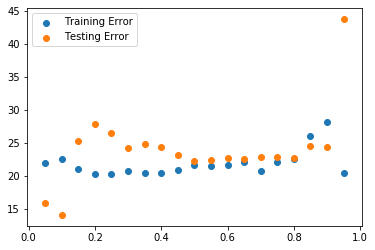

In [37]:
indeX = []
training_error = []
testing_error = []
model = LinearRegression()

for i in np.arange(0.05, 1, 0.05):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i, random_state = 3239)
    
    model.fit(X_train, y_train)
    predictions_train = model.predict(X_train)
    predictions_test  = model.predict(X_test)
    mse_train = mean_squared_error(y_train, predictions_train)
    mse_test  = mean_squared_error(y_test, predictions_test)
    indeX.append(i)
    training_error.append(mse_train)
    testing_error.append(mse_test)
    
fig = plt.figure()
plt.scatter(indeX, training_error, label = 'Training Error')
plt.scatter(indeX, testing_error, label = 'Testing Error')
plt.legend()
plt.show()


# Evaluate the effect of train-test split size: Extension

Repeat the previous example, but for each train-test split size, generate 100 iterations of models/errors and save the average train/test error. This will help account for any particularly good/bad models that might have resulted from poor/good splits in the data. 

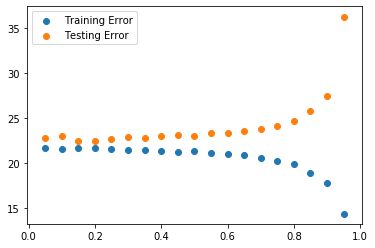

In [44]:
indeX = []
training_error = []
testing_error = []
model = LinearRegression()

for i in np.arange(0.05, 1, 0.05):
    temp_training_error = []
    temp_testing_error = []
    indeX.append(i)
    
    for j in range(1000):
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = i)
        model.fit(X_train, y_train)
        predictions_train = model.predict(X_train)
        predictions_test  = model.predict(X_test)
        mse_train = mean_squared_error(y_train, predictions_train)
        mse_test  = mean_squared_error(y_test, predictions_test)
        temp_training_error.append(mse_train)
        temp_testing_error.append(mse_test)
    
    training_error.append(np.mean(temp_training_error))
    testing_error.append(np.mean(temp_testing_error))
    
    
fig = plt.figure()
plt.scatter(indeX, training_error, label = 'Training Error')
plt.scatter(indeX, testing_error, label = 'Testing Error')
plt.legend()
plt.show()


What's happening here? Evaluate your result!

##  Summary 

Congratulations! You now practiced your knowledge of MSE and used your train-test split skills to validate your model.